In [1]:
import pymongo
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter 
from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
client = pymongo.MongoClient('localhost', 27017)
db = client['jianshu']
coll = db['users_info']

In [3]:
all_u_cnt = coll.find().count()

active_u_cnt = coll.find({"follow": {"$ne": 0},
                          "words_count": {"$ne": 0},
                          "get_likes": {"$ne": 0}}).count()

zombie_u_cnt = coll.find({"follow": 0,
                          "words_count": 0,
                          "get_likes": 0}).count()

ordinary_u_cnt = coll.find({"$or":
                          [{"follow": 0},
                           {"words_count": 0},
                           {"get_likes": 0}]}).count() - zombie_u_cnt

if all_u_cnt == active_u_cnt + zombie_u_cnt + ordinary_u_cnt:
    print("抽样总量:{}\n活跃用户:{}\n僵尸用户:{}\n普通用户:{}".format(all_u_cnt, active_u_cnt, zombie_u_cnt, ordinary_u_cnt))

抽样总量:533818
活跃用户:167134
僵尸用户:102818
普通用户:263866


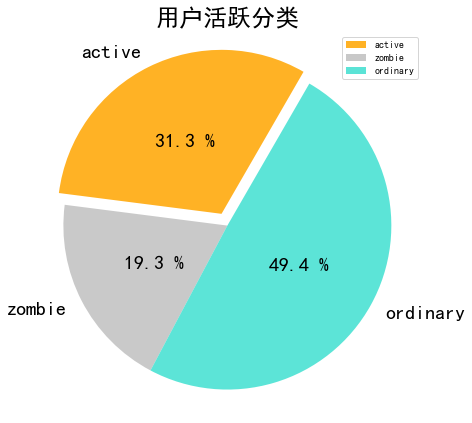

In [4]:
plt.figure("pie", figsize=(7, 7))
plt.title('用户活跃分类', fontsize=24)  
label_tags = ("active", "zombie", "ordinary")
label_values = active_u_cnt, zombie_u_cnt, ordinary_u_cnt,
explode = 0.08, 0, 0
colors = '#FFA500','#C0C0C0','#40E0D0'

patches,l_text,p_text = plt.pie(
        label_values, labels=label_tags, explode=explode,colors=colors,
        autopct='%3.1f % %', labeldistance=1.1, startangle = 60,pctdistance = 0.5,
        shadow=False,
        )
#labeldistance，文本的位置离远点有多远，1.1指1.1倍半径的位置
#autopct，圆里面的文本格式，%3.1f%%表示小数有三位，整数有一位的浮点数
#shadow，饼是否有阴影
#startangle，起始角度，0，表示从0开始逆时针转，为第一块。一般选择从90度开始比较好看
#pctdistance，百分比的text离圆心的距离
#patches, l_texts, p_texts，为了得到饼图的返回值，p_texts饼图内部文本的，l_texts饼图外label的文本

#改变文本的大小
#方法是把每一个text遍历。调用set_size方法设置它的属性
for p in patches:
    p.set_alpha(.85)
for t in l_text:
    t.set_size(20)
for t in p_text:
    t.set_size(20)

plt.axis('equal')
plt.legend()
plt.show()

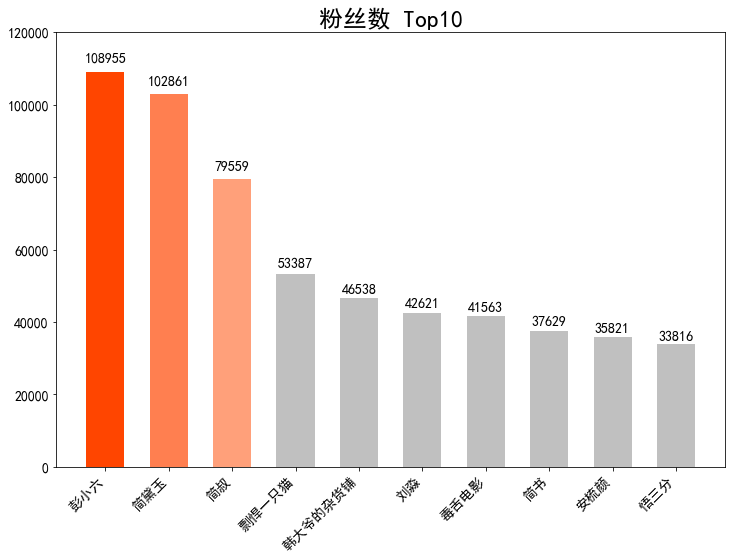

In [5]:
def get_plot():
    index = np.arange(len(user_list))  
    bar_width = 0.6
    opacity = 1
    color_list = ['#C0C0C0']*10
    color_list[0] = '#FF4500'
    color_list[1] = '#FF7F50'
    color_list[2] = '#FFA07A'

    plt.xticks(index, user_list, fontsize=14,rotation= 45, horizontalalignment='right')
    plt.yticks(fontsize=14)
    plt.bar(index , cnt_list, bar_width, alpha=1, color=color_list)

    for m, n in zip(index,cnt_list):
        plt.text(x=m,y= n * 1.02,s=n ,ha='center',va='bottom', fontsize=14)

    plt.show()

##########################################

user_list = []
cnt_list = []
top10_list = coll.find().sort([("fans", -1)]).limit(10)
for i in top10_list:
    user_list.append(i["user_name"])
    cnt_list.append(i["fans"])

plt.figure("Fans Top10", figsize=(12, 8))
plt.title('粉丝数 Top10', fontsize=24)  
plt.xlabel('')  
# plt.ylabel('粉丝数', fontsize=12, rotation= 90)
plt.ylim(0,120000)
plt.xlim()
width = 0.5

get_plot()

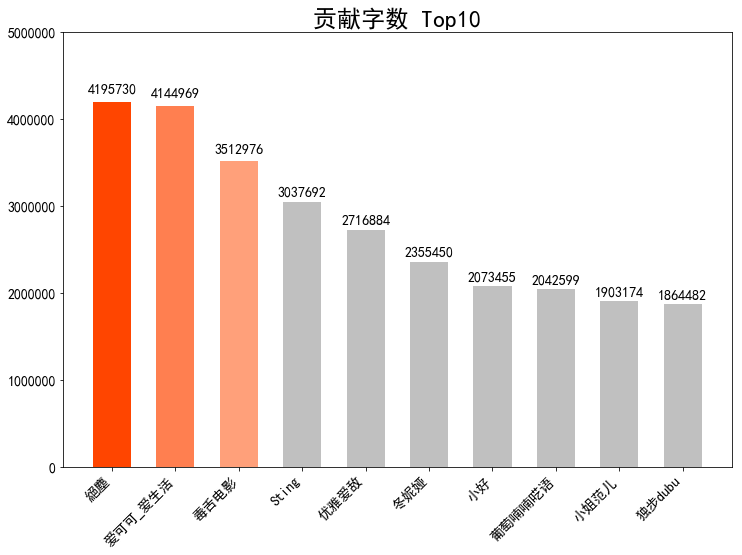

In [6]:
user_list = []
cnt_list = []
top10_list = coll.find().sort([("words_count", -1)]).limit(10)
for i in top10_list:
    user_list.append(i["user_name"])
    cnt_list.append(i["words_count"])

plt.figure("Words Top10", figsize=(12, 8))
plt.title('贡献字数 Top10', fontsize=24)  
plt.xlabel('')  
# plt.ylabel('', fontsize=12, rotation= 90)
plt.ylim(0,5000000)
plt.xlim()

get_plot()

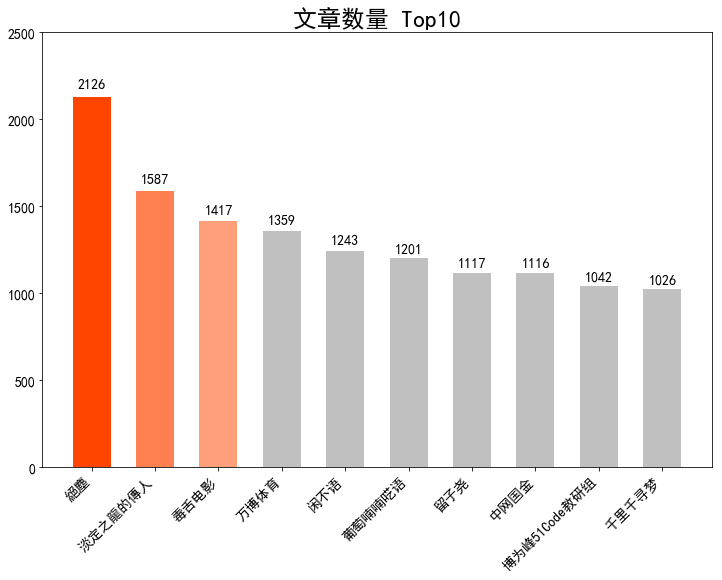

In [7]:
user_list = []
cnt_list = []
top10_list = coll.find().sort([("article", -1)]).limit(10)
for i in top10_list:
    user_list.append(i["user_name"])
    cnt_list.append(i["article"])

plt.figure("Articles Top10", figsize=(12, 8))
plt.title('文章数量 Top10', fontsize=24)  
plt.xlabel('')  
# plt.ylabel('', fontsize=12, rotation= 90)
plt.ylim(0,2500)
plt.xlim()

get_plot()

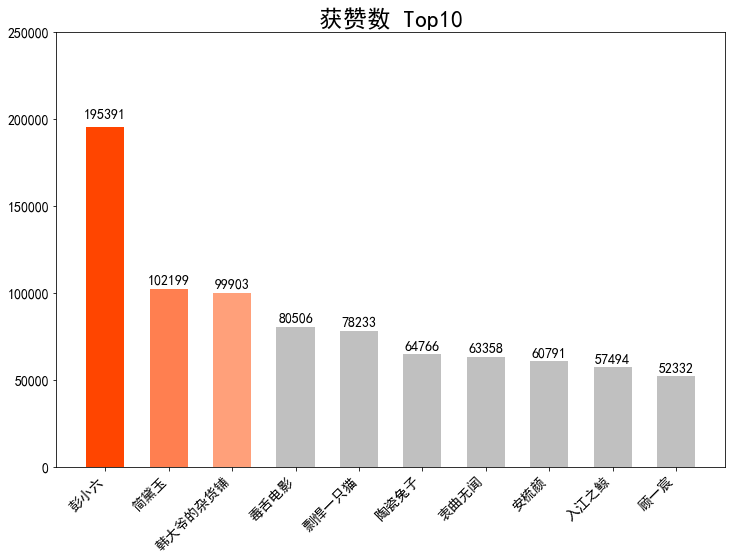

In [8]:
user_list = []
cnt_list = []
top10_list = coll.find().sort([("get_likes", -1)]).limit(10)
for i in top10_list:
    user_list.append(i["user_name"])
    cnt_list.append(i["get_likes"])

plt.figure("Get Likes Top10", figsize=(12, 8))
plt.title('获赞数 Top10', fontsize=24)  
plt.xlabel('')  
# plt.ylabel('', fontsize=12, rotation= 90)
plt.ylim(0,250000)
plt.xlim()

get_plot()

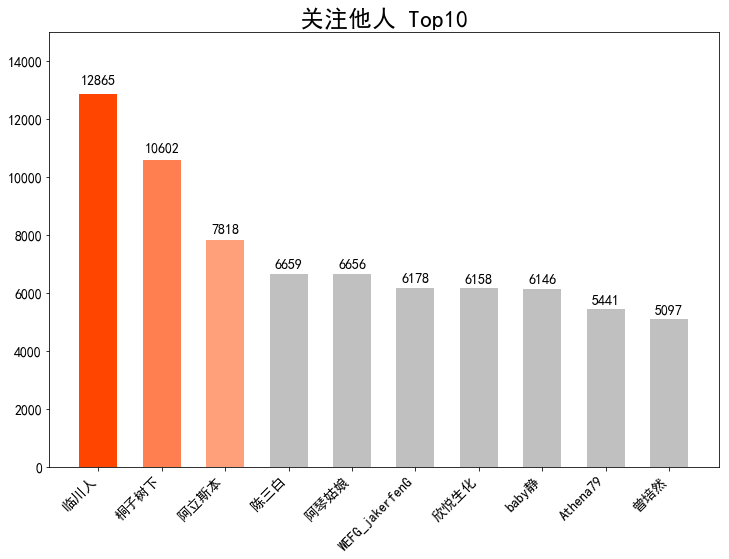

In [9]:
user_list = []
cnt_list = []
top10_list = coll.find().sort([("follow", -1)]).limit(10)
for i in top10_list:
    user_list.append(i["user_name"])
    cnt_list.append(i["follow"])

plt.figure("Follow Top10", figsize=(12, 8))
plt.title('关注他人 Top10', fontsize=24)  
plt.xlabel('')  
# plt.ylabel('', fontsize=12, rotation= 90)
plt.ylim(0,15000)
plt.xlim()
# 不显示坐标轴的值
# plt.xticks(())
# plt.yticks(())

get_plot()

In [30]:
user_obj = coll.find({"follow": {"$ne": 0},
                      "words_count": {"$ne": 0},
                      "get_likes": {"$ne": 0}})

art_list = []
wrd_list = []
lik_list = []
flw_list = []
fan_list = []

for _ in user_obj:  
    art_list.append( _['article'])
    wrd_list.append( _['words_count'])
    lik_list.append( _['get_likes'])
    flw_list.append( _['follow'])
    fan_list.append( _['fans'])

In [ ]:
l1 = np.array(wrd_list)
l2 = np.array(art_list)

plt.figure(figsize=(12, 8))

plt.subplot(212) 
plt.title('文章数及字数分布', fontsize=18)
plt.xlabel('文章数')
plt.ylabel('字数')

plt.scatter(art_list,wrd_list ,s=15 ,c='r',marker='+' ,alpha = 0.2, label='red_point')
# scatter用于绘制散点
# ax.scatter(x1cord2,x2cord2,s=30,c='green')#至此绘制出了分别属于两类的点
plt.xlim(0,500)
plt.ylim(0,1000000)

plt.xticks(range(0,500,50))
plt.yticks(range(0,1000000,200000))
# 不显示坐标轴的值
# plt.xticks(())
# plt.yticks(())
plt.legend()
plt.show()